# Natural Language Processing

We will do a very basic example of an NLP model, Namely the bag of words Model.

the bag of words model is a way of converting any new sentence of text into an unique valued vector. We can then use these vectors as a matrix and now we just have a large dataset we can do some ML on

To do this simeple one we will use it to idnetify if a review is good or bad, this is most useful as an intermediate step in another anaylsis. Say we want to see how good a business is we can create a feature based on the number of good vs bad reviews it gets

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [4]:
## delime is set to tabs as were using a csv, and we also set the quoting value to threee, 
## this ignores all quotes in the text so we dont get any errors later on
dataset = pd.read_csv('Data/Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)
display(dataset, dataset.shape)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


(1000, 2)

## Cleaning the texts

In [13]:
import re
import nltk
nltk.download('stopwords')

# this will help us remove all of the basic works that arnt an indicator like "the" and "if"
from nltk.corpus import stopwords
# here we can change all version of each verb to a stabderd kind, ie "loved" -> "love"
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\magee\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [78]:
def clean_text(text_raw):
    # first lets remove all puntionations
    text = re.sub('[^a-zA-Z]', ' ', text_raw)
    
    # make it all lower case
    text = text.lower()
    
    # seperates it out into its distinct words
    text = text.split()
    
    ps = PorterStemmer()
    
    # removeing not from the stopwords so we can keep negations
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    
    #remove all stop words from the review, and stem all of teh verb versions
    text = [ps.stem(word) for word in text if not word in set(all_stopwords)]
    
    # join back into one string
    text = ' '.join(text)
    
    return text
    

In [79]:
cleaned_text = []
for i, j in dataset.iterrows():
    review = clean_text(j["Review"])
    cleaned_text.append(review)

In [80]:
display(cleaned_text)

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow

Its very much worth noting that the stopped text also didnt take into consideration negation, as in not, manually ermoved not but some may still remain

## Creating the Bag of Words model

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(cleaned_text).toarray()
y = dataset.iloc[:, -1].values

In [32]:
X.shape

(1000, 1566)

seing there are 1566 unique words we can remove the lowest amount from the bag of words as they mostly non indicators liek names ect.

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(cleaned_text).toarray()
y = dataset.iloc[:, -1].values

In [34]:
X.shape

(1000, 1500)

## Splitting the dataset into the Training set and Test set

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

## Training one of our previous models to model the data

only showing the mode that performed the best, quickly checked the other models by accuracy

In [50]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[92  8]
 [31 69]]


0.805

## Predicting the Test set results

In [51]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]

## Predict a new reviews state

In [98]:
New_Review = 'the food was not to my expectations'
x = clean_text(New_Review)
cleaned_x = cv.transform([x]).toarray()
print(classifier.predict(cleaned_x))

[0]


messing around with examples leads tp very accurate answers to weither the review was good or bad

## Making the Confusion Matrix

In [56]:
cm[0][1]

8

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_recall_fscore_support(y_test, y_pred, average=None)[0][0])
print('Recall', precision_recall_fscore_support(y_test, y_pred, average=None)[1][0])
print('F1 score', precision_recall_fscore_support(y_test, y_pred, average=None)[2][0])

[[92  8]
 [31 69]]
Accuracy 0.805
Precision 0.7479674796747967
Recall 0.92
F1 score 0.8251121076233183


## Plotting the ROC curve

Model: ROC AUC=0.805


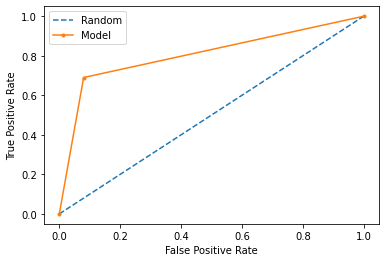

In [53]:
from sklearn.metrics import roc_auc_score, roc_curve

random_probs = [0 for _ in range(len(y_test))]
model_auc = roc_auc_score(y_test, y_pred)
print('Model: ROC AUC=%.3f' % (model_auc))

random_fpr, random_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

model_fpr, model_tpr, _ = roc_curve(y_test, y_pred, pos_label=1)

plt.plot(random_fpr, random_tpr, linestyle='--', label='Random')
plt.plot(model_fpr, model_tpr, marker='.', label='Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Final thoughts

Though this was a first look at some very basic NLP it got some decent accruacy and a good confusion matrix with SVM.

We could firther inprove this model by paying closer attention to the stop words set and also tuning some parameters and hyperparameters of our model, but for a beginning demo i belive this should suffice